This code is for analysis is eviction rates per month and initiation types per month in 2020-2021. It is for the purpose of seeing patterns in evictions and whether some policies were great.

Done by: Merna Alghannam, Team 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ROOT_FOLDER = '/Users/merna/OneDrive/Desktop/ds-state-ma-housing-comitt/'

In [3]:
# data is now our pandas DataFrame containing all of the data from our csv file
#These files exist in the State Mass.../Datasets/..
#first file contains months Nov. 2020 - Oct 2021
df = pd.read_csv(ROOT_FOLDER + "eviction_data/2021-11-02-2220-bu-m18_aug.csv")
#second file contains months Nov. 2019 - March 2020
df1 = pd.read_csv(ROOT_FOLDER + "eviction_data/2021-11-02-bu-m0_aug.csv")

C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
comb_df = pd.concat([df,df1], axis=0, ignore_index=True)

In [5]:
#Create columns for months and year for ease of analysis
comb_df['date'] = pd.to_datetime(comb_df['file_date'],format='%m/%d/%Y')
comb_df['year'] = pd.DatetimeIndex(comb_df['date']).year
comb_df['month'] = pd.DatetimeIndex(comb_df['date']).month

In [6]:
#count all evictions for each month and add to eviction count array
def calculate_eviction_by_date(df):
    eviction_count=[]
    for i in range(11,13):
        temp = df[df['month'] == i][df['year'] == 2019]
        eviction_count.append(len(temp.year))
    for i in range(1,4):
        temp = df[df['month'] == i][df['year'] == 2020]
        eviction_count.append(len(temp.year))
    for i in range(11,13):
        temp = df[df['month'] == i][df['year'] == 2020]
        eviction_count.append(len(temp.year))
    for i in range(1,11):
        temp = df[df['month'] == i][df['year'] == 2021]
        eviction_count.append(len(temp.year))
    return eviction_count

C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShell

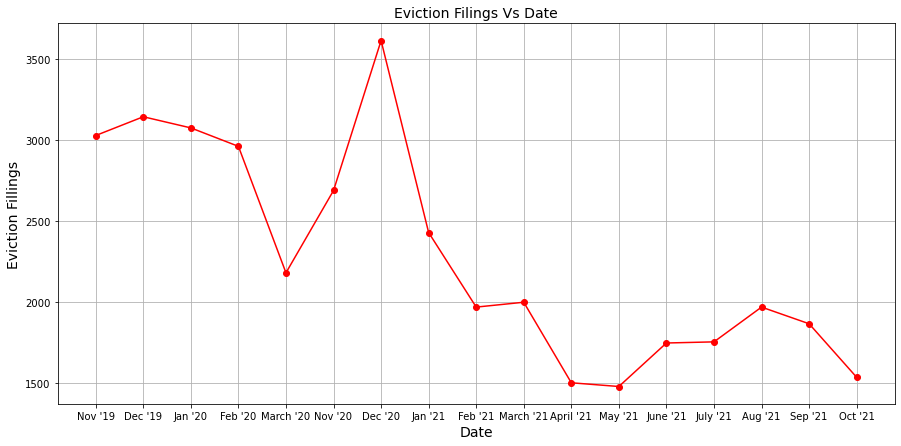

In [7]:
#count all evictions for each month and add to eviction count array
eviction_count = calculate_eviction_by_date(comb_df)

#plot the eviction fillings number per month in the state of massachussetts
Month_Year = ["Nov '19", "Dec '19", "Jan '20", "Feb '20", "March '20", "Nov '20", "Dec '20", "Jan '21", "Feb '21", "March '21", "April '21", "May '21", "June '21", "July '21", "Aug '21", "Sep '21", "Oct '21"]
plt.figure(figsize=(15, 7))
plt.plot(Month_Year, eviction_count, color='red', marker='o')
plt.title('Eviction Filings Vs Date', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Eviction Fillings', fontsize=14)
plt.grid(True)
plt.show()

In [8]:
#count all evictions for each month and add to eviction count array for randolph
eviction_count_randolph = calculate_eviction_by_date(comb_df[comb_df['property_address_city'] == "Randolph"])

C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShell

<Figure size 1080x504 with 0 Axes>

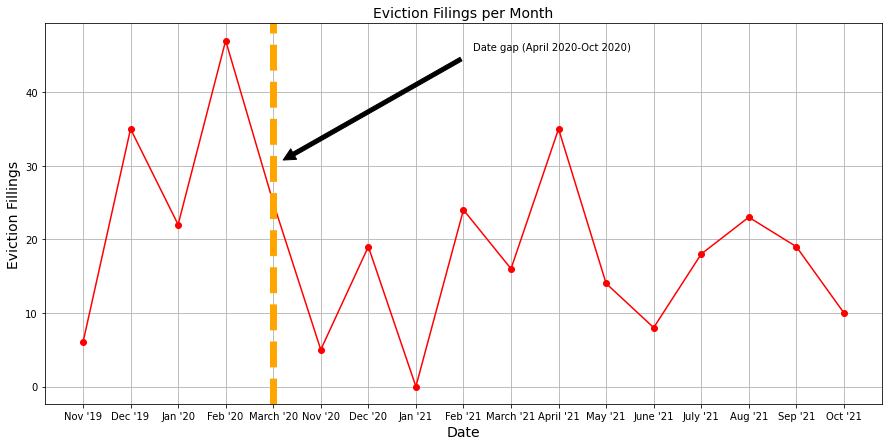

In [9]:

#plot the eviction fillings number per month in randolph
Month_Year = ["Nov '19", "Dec '19", "Jan '20", "Feb '20", "March '20", "Nov '20", "Dec '20", "Jan '21", "Feb '21", "March '21", "April '21", "May '21", "June '21", "July '21", "Aug '21", "Sep '21", "Oct '21"]
plt.figure(figsize=(15, 7))
plt.figure(figsize=(15, 7))
plt.plot(Month_Year, eviction_count_randolph, color='red', marker='o')

#annotate different times
plt.annotate('Date gap (April 2020-Oct 2020)', xy=("March '20", 30),  xycoords='data',
            xytext=(0.7, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.axvline(x="March '20", ls="--", lw=7, color='orange')

plt.title('Eviction Filings per Month', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Eviction Fillings', fontsize=14)
plt.grid(True)
plt.show()

In [10]:
gateway_cities = ["Attleboro", "Brockton", "Chelsea", "Chicopee", "Everett", "Fall River", "Fitchburg", "Haverhill", "Holyoke",
                  "Lawrence", "Leominster", "Lowell", "Lynn", "Malden", 
                  "Methuen", "New Bedford", "Peabody", "Pittsfield", "Quincy", "Revere", "Salem", "Springfield", "Taunton", "Westfield", "Worcester"]

#count all evictions for each month and add to eviction count array for all gateway cities
eviction_count_gateway= calculate_eviction_by_date(comb_df[comb_df['property_address_city'].isin(gateway_cities)])

#count all evictions for each month and add to eviction count array for all municipalities besides gateway cities
eviction_count_non_gateway = calculate_eviction_by_date(comb_df[~comb_df['property_address_city'].isin(gateway_cities)])

C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShell

[1464, 1623, 1467, 1370, 977, 1277, 1243, 523, 462, 760, 414, 533, 719, 752, 780, 742, 653]


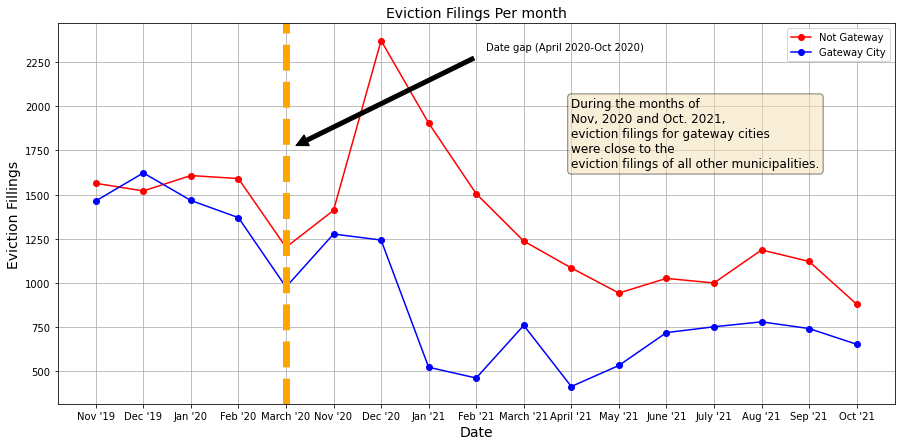

In [11]:


Month_Year = ["Nov '19", "Dec '19", "Jan '20", "Feb '20", "March '20", "Nov '20", "Dec '20", "Jan '21", "Feb '21", "March '21", "April '21", "May '21", "June '21", "July '21", "Aug '21", "Sep '21", "Oct '21"]
plt.figure(figsize=(15, 7))
#plot the eviction fillings number per month in gateway cities
plt.plot(Month_Year, eviction_count_non_gateway, color='red', marker='o', label='Not Gateway')
#plot the eviction fillings number per month in none gateway cities
plt.plot(Month_Year, eviction_count_gateway, color='blue', marker='o', label='Gateway City')

#annotate different times
plt.annotate('Date gap (April 2020-Oct 2020)', xy=("March '20", 1750),  xycoords='data',
            xytext=(0.7, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.axvline(x="March '20", ls="--", lw=7, color='orange')

#annotate key findings
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text("April '21", 2050, "During the months of \nNov, 2020 and Oct. 2021, \neviction filings for gateway cities \nwere close to the \neviction filings of all other municipalities.", fontsize=12,
        verticalalignment='top', bbox=props)
print(eviction_count_gateway)
plt.title('Eviction Filings Per month', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Eviction Fillings', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [12]:
comb_df[comb_df['year'] == 2020][comb_df['month'] == 12]['initiating_action'].value_counts()

C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Efiled SP Summons and Complaint - Non-payment of Rent                          2190
Summary Process - Residential (c239)                                            478
SP Summons and Complaint - Non-payment of Rent                                  366
Efiled SP Summons and Complaint - Cause                                         239
Efiled SP Summons and Complaint - No Cause                                      173
SP Summons and Complaint - No Cause                                              83
SP Summons and Complaint - Cause                                                 36
SP Transfer - Non-payment of Rent                                                19
Efiled SP Summons and Complaint - Foreclosure                                    19
SP Transfer- No Cause                                                             5
SP Transfer - Cause                                                               3
SP Transfer - Foreclosure                                                   

In [17]:
#Calculate how many of each ininitation types occured per month
def calculate_types_of_initations_per_month(month1, tomonth, year, df):
    #this is very manual and too complicated
    non_payment_bank = ['Summary Process Residential Non-payment of Rent',
           'Summary Process - Residential-Cause other than Non payment of rent.',
           'SP Summons and Complaint - Non-payment of Rent',
           'Efiled SP Summons and Complaint - Non-payment of Rent',
           'SP Summons and Complaint - Non-payment']
    cause_bank = ['Efiled SP Summons and Complaint - Cause',
           'SP Summons and Complaint - Cause',
           'SP Transfer - Cause', 'P Summons and Complaint - Cause',
           'Efiled SP Summons and Complaint - Cause',
           'SP Summons and Complaint - Cause',
           'SP Transfer - Cause',
           'Summary Process - Residential-Cause other than Non payment of rent.',]
    no_cause_bank =['SP Summons and Complaint - No Cause',
           'Efiled SP Summons and Complaint - No Cause',
           'SP Transfer - Non-payment of Rent', 'SP Transfer- No Cause',
           'SP Summons and Complaint - No Caus'
           'Efiled SP Summons and Complaint - Cause',
           'SP Summons and Complaint - Cause',
           'SP Summons and Complaint - No Cause',
           'Efiled SP Summons and Complaint - No Cause',
           'SP Transfer- No Cause',]
    foreclosure_bank = ['Efiled SP Summons and Complaint - Foreclosure',
           'SP Summons and Complaint - Foreclosure',
           'SP Transfer - Foreclosure']
    non_payment = []
    no_cause =[]
    cause=[]
    foreclosure=[]
    other=[]
    #loop through all the months specified and count how many of each type occured
    #per month
    for i in range(month1,tomonth):
        temp1 = df[df['month'] == i][df['year'] == year]
        sum1=0
        sum2=0
        sum3=0
        sum4=0
        sum5=0
        #loop through each initiation type in that month
        for reason in temp1['initiating_action']:
            if reason in non_payment_bank:
                sum1+=1
            elif reason in no_cause_bank:
                sum2+=1
            elif reason in cause_bank:
                sum3+=1
            elif reason in foreclosure_bank:
                sum4+=1
            else:
                sum5+=1
        non_payment.append(sum1)
        no_cause.append(sum2)
        cause.append(sum3)
        foreclosure.append(sum4)
        other.append(sum5)
    return non_payment, no_cause, cause, foreclosure, other

In [22]:
#calculated for both 2020 and 2021
non_payment, no_cause, cause, foreclosure, other = calculate_types_of_initations_per_month(11, 13, 2020, comb_df[comb_df['property_address_city']=='Randolph'])
non_payment1, no_cause1, cause1, foreclosure1, other1 = calculate_types_of_initations_per_month(1, 11,2021, comb_df[comb_df['property_address_city']=='Randolph'])

#concatinate them together
non_payment = non_payment + non_payment1
no_cause =no_cause+no_cause1
cause=cause+cause1
foreclosure=foreclosure+foreclosure1
other=other+other1

C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\merna\anaconda3\envs\tf1.13\lib\site-packages\ipy

In [23]:
#turn them into np
non_payment = np.array(non_payment)
no_cause =np.asarray(no_cause)
cause=np.asarray(cause)
foreclosure=np.asarray(foreclosure)
other=np.asarray(other)

<Figure size 1080x504 with 0 Axes>

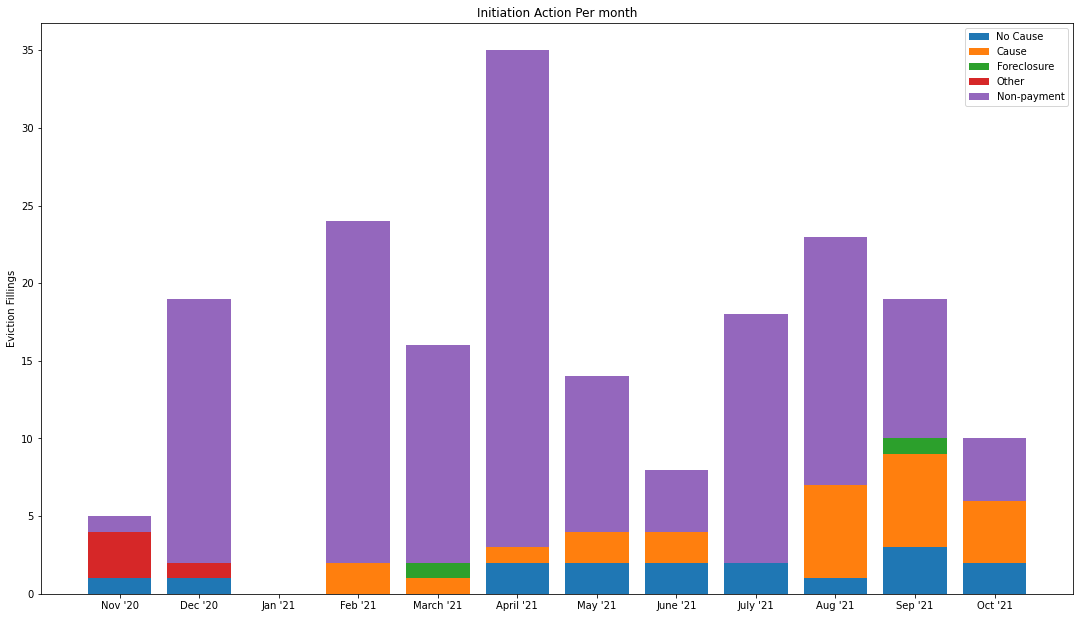

In [24]:
Month_Year = ["Nov '20", "Dec '20", "Jan '21", "Feb '21", "March '21", "April '21", "May '21", "June '21", "July '21", "Aug '21", "Sep '21", "Oct '21"]
plt.figure(figsize=(15, 7))

#plot the initiation types count per month as a stacked par plot
fig, ax = plt.subplots()
# fig.figure(figsize=(8, 6))
ax.bar(Month_Year, no_cause, label='No Cause')
ax.bar(Month_Year, cause, bottom=no_cause, label='Cause')
ax.bar(Month_Year, foreclosure, bottom=no_cause+cause, label='Foreclosure')
ax.bar(Month_Year, other, bottom=no_cause+cause+foreclosure, label='Other')
ax.bar(Month_Year, non_payment,bottom=no_cause+cause+foreclosure+other, label='Non-payment')

ax.set_ylabel('Eviction Fillings')
ax.set_title('Initiation Action Per month')
ax.legend()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()